# 3. Loops, Program Syntax, and Miscellany 

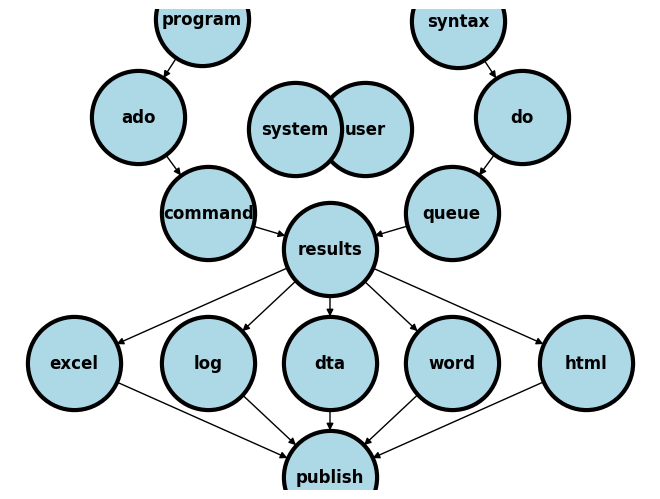

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
#import numpy as np
#import sklearn as skl
# 

#plt.figure(figsize=[2, 2])
G = nx.DiGraph()
G.add_node("user",  pos = (550,500) )
G.add_node("system",  pos = (-550,500) )
G.add_node("program",  pos = (-2000, 960) )
G.add_node("syntax",  pos = (2000, 950) )
G.add_node("ado", pos = (-3000, 550) )
G.add_node("do", pos = (3000, 550) )
G.add_node("command", pos = (-1900, 150) )
G.add_node("queue", pos = (1900, 150) )
G.add_node("results", pos = (0,0))
G.add_node("dta", pos = (0, -475))
G.add_node("log", pos = (-1900, -475))
G.add_node("excel", pos = (-4000, -475))
G.add_node("word", pos = (1900, -475))
G.add_node("html", pos = (4000, -475))
G.add_node("publish", pos = (0, -950))
G.add_edges_from([ ("program","ado"), ("syntax", "do")])
G.add_edges_from([("ado", "command"), ("do", "queue") ])
G.add_edges_from([("command", "results"), ("queue", "results"),("results","excel"),("results","word"),("results","html")])
G.add_edges_from([("results","dta"),("results","log")])
G.add_edges_from([("dta","publish"),("log","publish"),("excel","publish"),("word","publish"),("html","publish")])
nx.draw(G, 
        nx.get_node_attributes(G, 'pos'), 
        with_labels=True, 
        font_weight='bold', 
        node_size = 4500,
        node_color = "lightblue",
        linewidths = 3)
ax= plt.gca()
ax.collections[0].set_edgecolor("#000000")
ax.set_xlim([-5000, 5000])
ax.set_ylim([-1000, 1000])
plt.show()

By now you should be aware that our key ambitions are to:

   1. Learn the commands and syntax that generate output, typically for statistical inference
   2. Identify the names of the `c()`, `r()`, or `e()` class <u>system-defined</u> macros that define key parameters in our output
   3. Format these values to fit aesthetic, publication, or editorial criteria and save them as <u>user-defined</u> macros
   4. Embed the macros into text, graph, or file (.xlsx, .log, .dta, .docx, .html) 
   5. Achieve these aims in a workflow that is automated, collaborative, open, reproducible, legible, user-friendly, and therefore **rigorous** 

Today we are going to focus on commands and syntax that exponentially increase our efficiency in coding, a key step towards automation. One way to achieve this is by learning about loops. The other is by writing flexible programs that are driven by user-defined inputs. We'll also include miscellaneous code-snippets that you'll incorporate into your loops and programs. Please look out for the `macros` that emerge when you define a loop (e.g. `i`) or program (e.g. `varname`)

## 3[.](loops.ipynb)1 Loops


### 3.1.1 `forvalues`

In the realm of data analysis, especially when dealing with repetitive tasks, loops are your steadfast allies. They save time, reduce errors, and make your code cleaner. Consider the following Stata code snippet:

```stata
forvalues i = 1/26 {
    di `i'
}
```

#### What This Does

This loop iterates over a series of numbers—from 1 to 26, in this case. For each iteration, it executes the command `di` (short for "display"), printing the current value of `i` to the screen. At its core, this is a demonstration of Stata's `forvalues` command, a powerful tool for numeric iterations.

#### Why It's Useful

Imagine you're tasked with generating a report that requires you to repeatedly perform an action for a set range of numbers. Doing this manually is not only tedious but prone to error. By employing a loop like the one above, you automate the process, ensuring accuracy and efficiency. It's particularly handy for batch processing of data, running simulations, or automating the generation of graphs for different subsets of your dataset.

#### But Here's the Catch

While loops are powerful, they come with a caveat: misuse can lead to inefficiencies or, worse, infinite loops that can crash your system or bog down your computations. Always ensure your loop has a clear exit condition. In the example provided, the exit condition is built into the `forvalues` structure, terminating the loop after reaching the number 26.



### 3.1.2 `foreach`

Looping through numeric ranges is just the tip of the iceberg. When you're knee-deep in data analysis, more often than not, you'll find yourself needing to apply operations across numerous variables within your dataset. Here's where the `foreach` loop comes into play, showcasing its versatility:

```stata
use transplants, clear
foreach v of varlist * {
	di "`v'"
}
```

Notice the subtle difference between the above code snippet and the one below:

```stata
use transplants, clear
foreach v of varlist * {
	di `v'
}

```

Type `list in 1` to make sense of the above output. Are you interested in this output? How about trying something even more subtle:

```stata
use transplants, clear
foreach v of varlist * {
    // To display the variable label instead
    local vlabel : variable label `v'
    di "`vlabel'"
}
```

## 3.2 `syntax varlist`

We wrote our first program last week and it now time to build on that foundation

### 3.2.1 myfirst

We revisit our first program here:

```stata
capture program drop myfirst
program define myfirst
   cls
   di "Hello, class!"
end
```

Type `myfirst` to execute it

### 3.2.2 mysecond

Let our second program introduce `syntax varlist`  

```stata
capture program drop mysecond
program define mysecond
     syntax varlist
     di "This is my second program"
end
```

Execute this program with the command. Note: it requires **some** syntax beyond the `mysecond` command. In this case not any syntax would do; only a list of at least one of the variables in Stata's memory. This tells us that we also need to have a dataset in memory to use this command

### 3.2.3 mythird
Our third program will perform **something** potentially useful

```stata
capture program drop mythird
program define mythird
     syntax varlist
        logistic died gender 
end
```

But notice that the code is "hardcoded" to perform stricly one task. How may we make it flexible?

### 3.2.4. myfourth

```stata
capture program drop myfourth
program define myfourth
     syntax varlist
	 logistic `varlist'	 
end

```

## 3.3 Miscellany

In this section, we continue what was began in `lab 1 & 2`: expanding our Stata vocubulary. As we master Program syntax, we'll need to write programs that give the end-user power, efficiency, and flexibility. And there is no end to this journey. Keep learning something new, and please do share anything interesting you learn with peers and colleagues. We'll update this section each week, so remain vigillant! Ultimately, there'll be a course Stata syntax [catalog](catalog.md)

### 3.3.0 `import`

You might find comfort in the familiar `.dta` format presented to you during your Epidemiology and Biostatistics classes. However, when you collaborate with other researchers within or outside your institution, there is no guarantee that `.dta` will be the format of datasets available to you. So use this as a resource to quickly reference the syntax you may need. The choices here are based on the Stata dropdown menu: `file > import`. Here's a [resource](https://jhustata.github.io/basic/import_data.html) you may use. Otherwise, this section will be updated each week to offer more examples for your practice.

1. `.xlxs`
2. `.csv`
3. `.sav`
4. `.sas7bdat`
5. JDBC data source
6. ODBC data source
7. `.txt`
8. `.v8xpt`
9. `.xpt`
10. FRED
11. `.dbf`

#### `.xlxs`

```stata
import excel "https://raw.githubusercontent.com/jhustata/book/main/1-first%20gen%20antihisitamines.xlsx", sheet("de-duplicated list") clear
```

#### `.csv`
```stata
import delimited "https://raw.githubusercontent.com/jhustata/basic/main/entry_poll.csv", bindquote(strict) varn(1) clear 

//learn more about the options
help import delimited
```

#### `.sav`
Coming soon
#### `.sas7bdat`
Coming soon
#### JDBC
Coming soon
#### OBDC
Coming soon
#### `.txt`

```stata
import delimited "https://github.com/jhustata/book/raw/main/hw1.html", clear
```

You used this for your [HW1](https://jhustata.github.io/basic/chapter1.html#homework)

#### `.v8xpt`, `.xpt`

```stata
import sasxport5 "https://wwwn.cdc.gov/Nchs/Nhanes/1999-2000/DEMO.XPT", clear
```

Codebook available [here](https://wwwn.cdc.gov/Nchs/Nhanes/1999-2000/DEMO.htm)

#### FRED

Coming soon

#### `.dbf`
Coming soon

### 3.3.1 Commands that run without additional syntax

We'll use this familiar `.dta` dataset for most of the examples in this section

```stata
use transplants, clear
```

Learn a little more about your dataset:

```stata
describe
summarize
exit //don't include in your homeworks!!
```

### 3.3.2 Anatomy of a command with syntax

```stata
summarize wait_yrs age
tab rec_hcv
regress wait_yrs age rec_hcv
```

### 3.3.3 Taking on one or more options

```stata
describe, fullnames
exit, clear
tab race prev_ki, col nofreq
```

### 3.3.4 Some command options take arguments describing the options

```stata
tab rec_education,  sum(age)
regress wait_yrs age, level(90)
```

### 3.3.5 Involving file name, usually preceeded by `using` or `delimited`

```stata
append using transplants.dta
insheet using transplants.txt
```

### 3.3.6 Manipulating data with conditional statements: `if`, `in`

```stata
count if age > 50
list age dx rec_education in 1/5
```

### 3.3.7 `log` 

```stata
log using filename.log, replace 
use transplants, clear
log close
```

### 3.3.7 Stuff that belongs in every `.do` file
Review the [supplemental .do files](https://jhustata.github.io/basic/quickrefs.html#datasets-and-supplementary-materials) for examples

```stata
//log

//purpose

//settings

//code blocks

//close log
```

### 3.3.8 Use GitHub to manage versions of your `.do` and `ado.` files

- The days of having filenames such as `project.do`, `project_jul12.do`, `project_final.do` are over
- You'll only need a `project.do` and update the version with the same name in the same GitHub repo
- Commit statements will keep track of the version history if you make meaningful "commit" statements each time
- Perhaps consider taking the [Intermediate class](https://publichealth.jhu.edu/course/38942) for more on this topic

### 3.3.9 Loading a file into memory

```stata
use age dx using transplants
use transplants in 1/50, clear
use transplants in 44
use transplants if rec_work==1
use a* p* using transplants in 1/100
```

### 3.3.10 `describe`

```stata
describe
describe, simple
describe, short
describe a*
describe using transplants.dta
describe r*, fullnames
```

### 3.3.12 `codebook`

```stata
codebook a* e*, compact
codebook, problems
```

### 3.3.13 `list`

```stata
list
list prev_ki wait_yrs if race==9
list *date in 1/10
list dx in 1/10, clean noobs
list age, fast
```

### 3.3.14 `count`

```stata
count
count if rec_work==1
count if rec_work!=1
count if bmi < 20  | bmi > 35
count if bmi > 25 & bmi < 30>
count if !(age>18)
count if inrange(wait_yrs, 4,6)
count if !inlist(gender,0,1)
```

### 3.3.15 `tabulate`

```stata
//tabulate
tab abo
tab abo rec_hcv
tab gender, sum(age)
tab dx gender if age<40
tab dx gender,row
tab dx gender,col nofreq

tab dx gender, col nofreq chi2
return list 
```

### 3.3.16 `summarize`

```stata
//summarize
sum
return list //not very useful; see schema above

sum age wait_yrs
return list //much more useful!

sum age wait_yrs, detail
```

### 3.3.17 `if missing`

```stata
//missingness
count if bmi > 30
count if bmi > 1000 //wha? 
sum bmi //whats going on?
assert c(N) == r(N) //when do these diverge?
tab bmi if bmi > 1000
tab bmi if bmi > 1000, missing

count if bmi==.
count if bmi==.a
count if missing(bmi)
```

### 3.3.18 `generate`

```stata
gen age_lastyear=age-1
g any_college=(rec_educ>=3)
g youngman=(age<40) & (gender==0)
g byte young=(age<30)
g age_f=age if gender==1
g age_spline=(age>40)*(age-40)
```

### 3.3.19 More for your practice

```stata
//_n and _N
g new_id=_n
gen total_records=_N
g percentile=100*_n/_N

```

### 3.3.20 `preserve`, `restore`

This has briefly been covered in the preceeding section. But lets revisit it:

```stata

//preserve & restore
sum age

//indentation!
preserve
    drop if age<r(mean)
    sum age
restore 

sum age

//

di c(N)

di c(k)
```

Lets create a `disturbance` to our setup to learn a few additional commands and their value to us:

```Stata

qui do https://raw.githubusercontent.com/jhustata/book/main/sample-keep.ado
```

We've just installed a program called `samplekeep`. How do I know its name? You can past the URL into your browser to see the raw content and `program syntax`.

Focus on the structure of the program:

```stata
capture program drop samplekeep
program define samplekeep

	preserve 
	    
       //code

	restore 
	
end
```

So the .ado program we just installed has code sandwiched between `preserve` and `restore` commands. Let's executive the program:

```Stata
samplekeep
```

Wow!!

```stata
di c(N)

di c(k)
```

Does any of this make sense?


### 3.3.21 `by`

Ok, then. It was a temporary disturbance and peace was `restored`!! We will talk more about the `preserve` and `restore` commands, often used together. 

Let's now explore the `by` command

```stata
bys abo: egen age_byabo = mean(age)
```

Any idea what this command just achieved?

```stata
codebook age_byabo
```

What do you notice? Only four unique values! The `egen` command, like the `gen` command is used to define new variables in the dataset. However, the `gen` command applies values at the level of the individual. The `egen` command does so `by` group and yields summary `estimates`. To learn more type `h egen`.

### 3.3.22 `creturn list`, `ereturn list`, `return list`

```stata
qui regress peak_pra prev_ki
local coef_of_det: di %3.2f e(r2_a)*100

di "History of kidney transplant explains `coef_of_det'% of the variance in peak_pra."
```

From whence does `e(r2_a)` come? Where does it fit into our schema? (Hint: `return list`, `ereturn list`, `creturn list`)

```stata

//lets revisit this 
regress age i.abo
lincom _b[3.abo]
```

What blood group has value 3?

```stata
return list
di %3.2f r(p)
di %3.2f r(estimate)
```

```stata

//does this output look familiar?
 lincom _cons + _b[3.abo]
 return list 

//regression is a fancy way of estimating means for specified groups
 codebook age_byabo

```

Remember to use `lincom` appropriately, depending on what you wish to describe!

After a regression we may type `ereturn list` for all sorts of estimated values:

```Stata
matrix define b = e(b)
matrix list b
di b[1,3]
```

### 3.3.23 Line continuation

```stata

//line continuation

//Use `///` to make a Stata command span several lines in a .do file

recode race ///
    (1=1) ///
    (2=2) ///
    (4 5 6 7 9 = 9)

//That is the main-stream approach to line continuation. Ours?

#delimit ;
recode race
    (1=1)
    (2=2)
    (4 5 6 7 9)
;
#delimit cr

//recode+label, with unique line continuation with "delimit"
#delimit ;
recode race 
    (1=0 "Cauc")
    (2=1 "AA)
    (4=2 "Hisp/Latino")
    (5/9=3 "Other"),
        gen(race_cat)
;
#delimit cr

```

### 3.3.24 `label variable`

```stata

//labels
describe dx
label var dx "kidney disease diagnosis"

tab gender //is 1 male or female?
#delimit ;
label define g_label 
    0 "0=Male"
    1 "1-Female"
;
#delimit cr
label values gender g_label
tab gender //much better
tab gender, nolabel //don't show label

//or?
g female=gender==1 //intuitive meaning of 1 & 0
```

### 3.3.25 `tag`

```stata
//tagging
list abo gender spread
egen = tag
egen grouptag = tag(abo gender)
list abo gender spread if grouptag
```

### 3.3.26 `drop`, `keep`

```stata
//drop, keep
keep age gender bmi fake_id ra*
drop end_date

//remember: to load the original dataset again
use transplants, clear
keep in 1/100
drop if wait_yrs<1
keep if prev_ki==1
drop if age<18 & abo==2
```

### 3.3.27 `replace`

```stata
//load data again
use transplants, clear
replace prev=0
replace wait_yrs=5 if wait_yrs>5
replace gender=gender+1
replace bmi=. if !inrange(bmi,17,50)
```

### 3.3.28 `rename`

```stata
//rename
rename age age_at_transplant
rename gender female

use transplants, clear
rename (age gender)(age_at_transplant female)
```

### 3.3.29 `sort`, `gsort`

```stata
//sort, gsort
list in 1/10 
sort age
list in 1/10
sort age dx
list in 1/10
gsort -age dx -race 
list in 1/10
```



### 3.3.30 `recode`

```stata
//recode
recode rec_education (3 4 5 =9)
recode dx (1=1)(2=2)(*=9)
recode gender (0=1)(1=0),gen(male)

// recode + label, simultaneously!

recode race ///
    (1=0 "Cauc") ///
    (2=1 "AA) ///
    (4=2 "Hisp/Latino") ///
    (5/9=3 "Other"), ///
        gen(race_cat)

```

### 3.3.31 `display`

```stata
//display
sum wait_yrs
di "variable" _col(20) "mean"
di "wait time" _col(20) r(mean)


```

### 3.3.32 `capture`

```stata
capture sum nonexistent_variable
capture di 4+3
capture di 4+


```

### 3.3.33 `assert`

```stata

//assert 
assert age<100
assert end_date>=transplant_date
assert inlist(gender,0,1)
assert 2<1
assert 0
assert c(edition_real)=="BE"
assert c(edition_real)=="MP"


```

### 3.3.34 Scalars, macros, matrices

Saved results can be either of the following:
- Scalars (numbers)
- Macros (numbers, string, or both)
- Matrices (lists or tables of numbers)

```stata
sum bmi, detail
disp "median: " _col(12) r(p50)
disp "IQR: " _col(12) r(p25) "-" r(p75) disp "kurtosis: " _col(12) r(kurtosis)
```



### 3.3.35 `return list`

A command that saves results in `r()` is said to be an "r-class command"

```stata
summarize
tabulate
describe
codebook
count
duplicates
compare
correlate
lincom
test
roctab
sample 
centile
//etc
```

Type `return list` after running one of these commands and see what you get

##### Examples from the R-class

```stata
count if age < 45
disp r(N) " young patients"
tab race abo, chi2
disp "p-value: " r(p)

//
sum age
assert inrange(r(mean), 45, 55)
tab race abo, chi2
assert r(p) < 0.05

//
sum bmi
disp "Mean BMI: " r(mean)

//
sum bmi
disp "Mean BMI: " %4.1f r(mean)

//
sum bmi
disp "Mean BMI: " %4.0f r(mean)
```

There are dozens of different %format codes. For now, know that the format code for floating-point numbers looks like this: `%4.2f`

1. `%` character means "formatting code"
2. total width (oftenignored)
3. decimal point
4. `#` of digits to right of decimal point (mustbe < total width)
5. `f` character means "floatingpoint"(decimal `#`)

### 3.3.36 `ereturn list`

Some commands (mostly regression commands) are e-class. (The "e" stands for "estimation").

```stata
regress bmi gender age 
ereturn list

//log likelihood 
disp e(ll) -17256.867
```

```stata
//_b coefficient matrix
regress bmi gender age
disp _b[gender]

disp "estimated BMI: " %3.2f /// 
   _b[_cons] " + " %3.2f _b[age] /// 
      "*age (+ " _b[gender] ///
   " if male)"

```

```stata
//_se coefficient matrix
disp _se[gender]
disp _se[age]
```

### 3.3.37 `creturn list`

```stata
creturn list
```

The `creturn list` command in Stata is a powerful tool that provides a snapshot of current system properties and settings, which can be essential for managing data analyses in Stata. When discussing this command in your Jupyter book, you might want to include several key points:

1. **Explanation and Usage**: Begin by explaining what the `creturn list` command does. It displays a list of characteristics related to the current Stata session, such as the amount of memory in use, the number of variables and observations in the dataset, and the version of Stata being used. This command is particularly useful for troubleshooting and optimizing performance.

2. **Interpreting Output**: Detail the types of outputs provided by `creturn list` and what each one means. For example, `c(return_memory_total)` shows the total memory Stata has allocated for the session, and `c(N)` shows the number of observations in the current dataset.

3. **Practical Examples**: Include practical examples showing how `creturn list` can be used in real-world scenarios. For instance, you can demonstrate how to use this command to monitor memory usage over time, or how it can help determine whether Stata’s settings need adjustment for handling large datasets.

4. **Comparison with Other Commands**: Contrast `creturn list` with similar commands like `ereturn list` and `sreturn list`, which provide information about the results of the most recent estimation command and string results, respectively. This comparison will help users understand when to use each command.

5. **Advanced Tips**: Offer advanced tips for leveraging `creturn list` in programming and automation within Stata. For example, you could show how to capture these system properties programmatically and use them to make conditional decisions in do-files or ado-files.

6. **Updates and Version Specifics**: Note any version-specific features or limitations of the `creturn list` command. Stata updates may introduce changes to how system properties are handled, so highlighting these nuances can be very beneficial for users who work across different versions.

7. **Visual Aids**: Since you are working on a Jupyter book, make use of the interactive features available. Include code snippets directly in the text and possibly interactive widgets that allow readers to execute Stata commands and see the results in real-time.

By emphasizing these points, your section on the `creturn list` command will not only be informative but also practical, helping readers to effectively harness this tool in their data analysis tasks.

```stata
disp c(edition)
disp c(current_date)
disp c(os)
disp c(pi)
```

```stata
if c(version) >= 17 {
    disp "You are running Stata 17"
}
else {
    disp "You are running an earlier version of Stata"
}

//transparent graph colors
use transplants, clear

if c(version) >= 15 {
    tw scatter rec_wgt_kg rec_hgt_cm if age>18, mcolor(%20)
    tw scatter rec_wgt_kg rec_hgt_cm if age>18, mcolor(red%20)
}


//FRAMES (version 16)
if c(version) >= 16 {
    do lecture8_frames_2021
}


if c(version) >= 15 {
    do lecture8_putdocx_2021
}
```

Also, remember that `c(N)`, `e(N)`, and `r(N)` may be identical or diverge depending on patterns of missingness in your dataset


### 3.3.38 Indentation

```stata
qui {
cls
capture program drop myprogram 
program define myprogram
forvalues i = 1/10 {
if `i' < 5 {
display "`i' is less than five"
}
else {
display "`i' is at least five"
}
}
end
}

```

#### Notes on Indentation

Indentation is crucial in programming for several reasons:
- **Readability:** Proper indentation makes it easier for someone (including future you) to read and understand the code. It visually separates code blocks that belong to different logical structures like loops, if-else conditions, etc.
- **Debugging:** Indented code helps quickly identify structural errors such as missing loops or misaligned end statements.
- **Maintainability:** Well-indented code is easier to modify or expand because the structure of the program is clear and logical.

In the context of Stata:
- `Stata` does not require indentation for functionality (the program will run the same way whether it's indented or not), but it's considered best practice to use indentation to improve clarity. In contrast, `Python`, the most widely used language, will not run if you don't indent your code.


```stata
qui {  // Begin a block of commands to be executed quietly
    cls  // Clear the Stata results window

    capture program drop myprogram  // Safely remove any existing program named 'myprogram'
    
    program define myprogram  // Begin defining a new program called 'myprogram'
        forvalues i = 1/10 {  // Start a loop from 1 to 10, storing each value in 'i'
            if `i' < 5 {  // Check if the current value of 'i' is less than 5
                display "`i' is less than five"  // Display this message if the condition is true
            }
            else {  // If the condition is not true (i.e., `i` is 5 or more)
                display "`i' is at least five"  // Display this message
            }
        }  // End of the loop
    end  // End the program definition
}  // End of the quiet block
```

#### General Annotation Tips  

When annotating code:
- **Comment Generously:** Explain what each major block of code is intended to do, especially if the logic might not be immediately clear.
- **Use Clear, Descriptive Names:** While this script uses 'i' for a loop variable, which is quite common, always ensure that variable names elsewhere are descriptive.
- **Explain the Purpose:** Especially explain why certain commands are used (like `capture` which is used here to avoid errors if the program does not exist when trying to drop it).
- **GPT-4 for indentation, annotation, debugging:** You may copy and paste your code snippet into a generative AI interface and ask it to annotate your code. The above code block was both indented and annotated by `GPT-4`. `GitHub co-pilot` is also specifically develop to help with coding, but its a $15/month service and you may have to code in a GitHub compatible environment such as `Visual Studio Code`. Explore free GPTs including `GPT-3.5`, `Gemini`, and `Claude`. 

### 3.3.39 `regress`

```stata
//an easier way to do 95% CIs (version 15 and up)
version 15
regress bmi gender age
lincom age
return list
disp "Beta: " %3.2f r(estimate)
disp "CI: " %3.2f r(lb) "-" %3.2f r(ub)
lincom _cons
disp "Beta: " %3.2f r(estimate)
disp "CI: " %3.2f r(lb) "-" %3.2f r(ub)

logit don_ecd i.don_cod
lincom 2.don_cod
return list
disp "OR: " %3.2f exp(r(estimate))
disp "CI: " %3.2f exp(r(lb)) "-" %3.2f exp(r(ub))
lincom 2.don_cod, eform
disp "OR: " %3.2f r(estimate)
disp "CI: " %3.2f r(lb) "-" %3.2f r(ub)

disp "r(p): " r(p)
```


### 3.3.40 `local`

```stata
//local macros
//there's also such a thing as a *global* macro 
//but let's worry about those later
local a = 4  //set macro a equal to 4
disp `a'   //display the value of macro a

local a 4 //another way to set the value of a macro
disp `a'

local a 4 + 7  //this means, set a equal to "4 + 7". 
//At this point, Stata doesn't actually compute what 4+7 is

disp `a'*2  //becomes "disp 4 + 7*2" which is the same as 4+14 which is 18

local a = 4 + 7 //the equals means, *COMPUTE* 4+7 and set a equal to the answer
disp `a'*2  //becomes "disp 11*2" which is 22


//another macro example
//we want to display the mean age for males, and the mean age for females,
//on the same line
quietly sum age if gender==0
local age_m = r(mean)  //store mean age for males in macro "age_m"
quietly sum age if gender==1
local age_f = r(mean)  //store mean age for females in macro "age_f"
disp "Mean age: " %3.1f `age_m' " (males) " %3.1f `age_f' " (females)"
//Note the use of formatting code %3.1f. 
//one digit to the right of the decimal point will be shown.

//More macro examples
local my_var age  //my_var is a macro which equals "age"
disp "Here's a summary of `my_var'"  //displays "Here's a summary of age"
sum `my_var' //sumarizes age

local my_option detail
summarize `my_var', `my_option'
//Stata sees "summarize age, detail"

local my_command summarize  //my_command is a macro which equals "summarize"
//Stata sees "summarize age, detail"
`my_command' `my_var', `my_option'

//here are some additional macros not in the slides.
//they are a bit more complex but they show how this macro thing works
local mymacro gen
sum `mymacro'der  //Stata sees "sum gender"

local macro1 ma  //macro1 is "ma"
local macro2 age gender //macro2 is "age gender"
sum ``macro1'cro2' 
//first, `macro1' becomes "ma"
//so ``macro1'cro2' becomes `macro2'
//next, `macro2' becomes "age gender"
//so "sum `macro2'" becomes "sum age gender"

//In this case, in_study defines a subpopulation of age<45 and gender==male
//and then we run several commands using this macro
//if we later decide to include females instead, 
//all we have to do is change "gender==0" to "gender==1"
//and everything will run on females instead of males
local in_study if age<45 & gender==0
sum bmi `in_study'
sum peak_pra `in_study'
regress bmi age `in_study'

//here, "confounders" refers to a set of three variables
//you can imagine that we would do several different analyses 
//treating these variables the same.
//if we change the list of confounders, we just have to change the macro
//instead of changing every command
local confounders age gender peak_pra
regress bmi wait_yrs `confounders'



```

### 3.3.41 `quietly`

```stata
//review: quietly
//run a regression. Don't print any output or error messages
quietly regress bmi age

//a "quietly block": run several commands without printing anything
quietly {
    gen over40 = (age > 40)
    count if over40 == 1
    regress bmi over40
}

drop over40
//now, let's run several commands and only print output from the last one
quietly {
    gen over40 = (age > 40)
    sum bmi if over40 == 1
    noisily di "mean BMI: " %3.1f r(mean)
}
```

### 3.3.42 `which`

```stata
//which command. Show whether a command is built-in, or a stata .do file
which tab
which chelp
which gen
which regress
which help
which graph
```

### 3.3.43 `program define`

```stata
//define a program "do_something"
//first, if the program already exists in memory, delete it
//(NOTE: this is superfluous here, since line 9 says "clear all" which deletes
//all programs in memory... but it's a good idea to do "capture program drop"
//before any "program define"
capture program drop do_something

//now, define the program. All it does is display "It doesn't do much."
program define do_something  //create a program called do_something
    disp "It doesn't do much."  //here's what the program does.
end  //that's the end of the program definition

do_something

capture program drop do_something_else
program define do_something_else  //create a program called do_something
    disp "One line is not enough."
    disp "So display two lines."
end  //that's the end of the program definition

do_something_else

//now for a program that actually does something useful.
//NOTE: this would be more efficient with loops, but those come later

capture program drop table1
program define table1
    disp "Variable" _col(20) "mean (SD)" _col(40) "range"
    quietly sum age
    disp "age " _col(20) %3.2f r(mean) " (" %3.2f r(sd) ")" ///
            _col(40) %3.2f r(min) "-" %3.2f r(max)
    quietly sum wait_yrs
    disp "wait_yrs" _col(20) %3.2f r(mean) " (" %3.2f r(sd) ")" ///
            _col(40) %3.2f r(min) "-" %3.2f r(max)
    quietly sum bmi
    disp "bmi" _col(20) %3.2f r(mean) " (" %3.2f r(sd) ")" ///
            _col(40) %3.2f r(min) "-" %3.2f r(max)
end

use transplants, clear
table1

//table1 program from lecture 2
capture program drop table1
program define table1
    disp "Variable" _col(20) "mean (SD)" _col(40) "range"
    quietly sum age
    disp "age" _col(20) %3.2f r(mean) " (" %3.2f r(sd) ")" ///
            _col(40) %3.2f r(min) "-" %3.2f r(max)
    quietly sum wait_yrs
    disp "wait_yrs" _col(20) %3.2f r(mean) " (" %3.2f r(sd) ")" ///
            _col(40) %3.2f r(min) "-" %3.2f r(max)
    quietly sum bmi
    disp "bmi" _col(20) %3.2f r(mean) " (" %3.2f r(sd) ")" ///
            _col(40) %3.2f r(min) "-" %3.2f r(max)
end

table1
table1 age peak_pra

//add "syntax varlist" to control the list of variables
capture program drop table1_v
program define table1_v
    syntax varlist
    //write out a nicely formatted table 
    //NOTE: could also write out with commas instead of spacing
    //which would make it easier to import into Excel
    disp "Variable" _col(15) "mean(SD)" _col(30) "range"
    foreach v of varlist `varlist' {
        quietly sum `v'
        disp "`v'" _col(15) %3.2f r(mean) "(" %3.2f r(sd) ")" _col(30) ///
            %3.2f r(min) "-" %3.2f r(max)
    }
end

table1_v age wait_yrs rec_wgt_kg 

//demonstrate behavior of local macros inside programs
program define varprogram
    syntax varlist  
    disp "`varlist'"  //displays the varlist macro
end

//syntax varname: exactly one variable
program define varfavorite
    syntax varname  
    disp "My favorite variable is `varlist'"  //displays the varlist macro
end

varfavorite fake_id

varprogram fake_id
disp "`varlist'"  //displays nothing. Stata has forgotten the varlist macro

program define macroprog
    local a=4   //define local macro a
    disp "`a'        `b'"  //Stata knows macro a, but macro b is empty
end
local b=3   //define local macro b
macroprog
disp "`a'        `b'"  //Stata knows macro b, but macro a is empty


program define varprogram2
    syntax [varlist]   //now, "varlist" is optional
    disp "`varlist'"
end


varprogram2 fake_id
varprogram2 

program define myif
    syntax [if]  //accepts an optional "if" statement
    if "`if'" != "" {  //if there's something in the "if" statement...
        disp "`if'"    //display it
    }
    else {
        disp "No if statement"  //otherwise, display this message
    }
end



myif  //displays "no if statement"
myif if age > 35  //displays "if age > 35"

capture program drop countif
program define countif 
    syntax if
    quietly count `if'
    disp "total count is " r(N)
end




capture program drop table1_if
program define table1_if
    syntax varlist [if]
    //write out a nicely formatted table
    disp "Variable" _col(12) "mean(SD)" _col(25) "range"
    foreach v of varlist `varlist' {
        quietly sum `v' `if' 
        disp "`v'" _col(12) %3.2f r(mean) "(" %3.2f r(sd) ")" _col(25) ///
            %3.2f r(min) "-" %3.2f r(max)
    }
end

table1_if age peak_pra wait_yrs
table1_if age peak_pra wait_yrs if race==1 //summarize for only race==1

//tempvar

//non-working program - as an example
capture program drop tabyear0
program define tabyear0
    syntax varname
    gen year = year(`varlist')
    tab year
end

//here's how you *should* do it (using a temporary variable)
capture program drop tabyear
program define tabyear
    syntax varname
    tempvar year  //create a temporary variable called year
    //use backquote-apostrophe to refer to the temporary variable (like a macro)
    //NOTE: even if, by some chance, there's already a variable called "year",
    //this code will still work
    gen `year' = year(`varlist')
    tab `year'
    //the temporary variable disappears automatically when the program is done
end

tabyear transplant_date
tabyear end_date

//an example of what *not* to do when you want to temporarily alter the dataset
capture program drop savesample0
program define savesample0
    //save random 10% of records
    syntax using/ , [replace]
    sample 10 //delete 90% of records!
    save `using', `replace'
end

//here's how you should do it
capture program drop savesample
program define savesample
    //save random 10% of records
    syntax using/ , [replace]
    preserve   //save a temporary copy of the data
    sample 10 //no worries
    save `using' , `replace'
    //when the program reaches the end, the temporary copy is reloaded,
    //undoing any changes
end

count
savesample using tenpct.dta, replace
count

//another way to do table1_if
capture program drop table1_if2
program define table1_if2
    syntax varlist [if]
    preserve
    capture keep `if'
    //write out a nicely formatted table
    disp "Variable" _col(12) "mean(SD)" _col(25) "range"
    foreach v of varlist `varlist' {
        quietly sum `v' `if' 
        disp "`v'" _col(12) %3.2f r(mean) "(" %3.2f r(sd) ")" _col(25) ///
            %3.2f r(min) "-" %3.2f r(max)
    }
end

table1_if2 age peak_pra wait_yrs
table1_if age peak_pra wait_yrs if age<40 //summarize for only age<40

```


### 3.3.44 `by`

```stata

//by

use transplants, clear
sort abo
by abo: gen cat_n = _N //cat_n = # records in each abo category

sort abo age
by abo: gen cat_id = _n //1 for youngest patient, 2 for next youngest, etc.


```

### 3.3.45 `egen`

```stata
/egen

//obtaining mean age and storing it in a variable
use transplants, clear
egen mean_age = mean(age)

//more egen examples
egen median_age = median(age)
egen max_age = max(age)
egen min_age = min(age)
egen age_q1 = pctile(age), p(25) //25th percentile
egen age_sd = sd(age)  //standard deviation
egen total_prev = sum(prev) //add all the values (all are 1 or 0 in this case)

//using egen with by
use transplants, clear
sort dx
by dx: egen mean_age = mean(age)
by dx: egen min_bmi = min(bmi)

//combining sort and by to get bysort / bys
use transplants, clear
bys abo: egen m_bmi=mean(bmi)
bys abo gender: egen max_bmi = max(bmi)
bys abo gender: egen min_bmi = min(bmi)
gen spread = max_bmi - min_bmi
```

### 3.3.46 `tag`

```stata
//egen = tag
egen grouptag = tag(abo gender)
//now, for all gorups of abo/gender, (1/M, 3/F, etc), there's exactly one
//record that has grouptag = "1". All others have grouptag = "0".

list abo gender spread if grouptag


//graphing example with egen and tag
use transplants, clear
egen tag_race = tag(race)
bys race: egen mean_bmi=mean(bmi)
bys race: egen mean_age=mean(age)

label define race_label 1 "White" ///
    2 "Black/AA" 4 "Hispanic/Latino" ///
    5 "East Asian" 6 "Native American" ///
    7 "Asian Indian" 9 "Other"  //create a label race_label

//I personally find this more legible than cond() with seven cases,
//although cond() has its champions
gen racedesc = "White/Caucasian" if race==1
replace racedesc = "Black/AA" if race==2
replace racedesc = "Hispanic/Latino" if race==4
replace racedesc = "Native American" if race==5
replace racedesc = "East Asian" if race==6
replace racedesc = "Asian Indian" if race==7
replace racedesc = "Other" if race==9

twoway scatter m~_bmi m~_age if tag_race, ///
    title("Mean age and BMI by race/ethnicity") ///
    xtitle("Mean age") ytitle("Mean BMI") ///
    xlabel(40(2)60) ylabel(20(2)30) ///
    mlabel(racedesc)
graph export graph_lecture3.png, replace width(2400)
```

### 3.3.47 `if`

```stata
//conditional if
if _N > 100 {
    disp "Meh. That's a big dataset"
}
if _N > 10000 { 
    disp "That's a huge dataset"
}
else {
    disp "Bah! Not so big."
}



tab dx gender, chi2
if r(p) < 0.05 {
    disp "p<0.05"
}
else {
    disp %3.2f r(p)
}

count if !inlist(rec_hcv_antibody, 0, 1, .)
if r(N) == 0 {
    logistic rec_hcv_antibody age
}
else {
    disp "Non-binary outcome. " ///
        "can't do logistic regression"
}

//note the line continuation ( ///) in the previous else-statement. 
//line continuations can be used to improve readibility of a do-file, but 
//they should not change functionality.
//stata interprets " ///" as if the next line is on the same line

```

### 3.3.48 `for`

```stata
//for loops.
forvalues i = 1/5 {  //first time: create a macro i, set it equal to 1
    disp `i'        //display macro i
}                  //go back to the "forvalues" statement.
//the second time, macro i will equal 2 and it will run again.
//then it will go back and set i equal to 3 and run again
//and then run a fourth time with i equal to 4
//finally, it will run one last time with i equal to 5
//then it will stop.

//all the output from a "forvalues" loop is displayed together, because
//Stata doesn't actually start running code in the loop until you type the
//closing brace }. So if you have a bunch of "disp" statements and you want
//all the display to appear together (instead of separately, after each 
//"disp" command in your code) you can put it all inside a loop that
//only runs once.

//another example of "forvalues"
forvalues b = 35/45 {
    quietly count if age>=`b' & age<`b'+1
    disp "Age of `b': " r(N) " patients"
}


foreach v of varlist age wait_yrs died {
    if inlist("`v'", "age",  "wait_yrs") {
        quietly sum `v'
        disp "Mean `v': " _col(20) %3.2f r(mean)
    }
    else {
        quietly sum `v'
        disp "Percent `v': " _col(20) %3.2f 100 * r(mean) "%"
    }
}

//foreach works like forvalues. Except that forvalues sets the macro
//equal to a number which increases each time, and foreach sets the macro
//equal to something from a list.
//there are actually several varieties of foreach, but a useful one is 
//foreach... of varlist...

//first time through the loop, macro v will equal "age". Second time it will
//equal "wait_yrs". Third time it will equal "died".
foreach v of varlist age wait_yrs died { 
    quietly sum `v' //summarize whatever variable is referred to by "v"
    disp "Max `v': " _col(10) r(max) //display maximum value
}


//example of foreach.. of varlist with if-statement
foreach v of varlist age wait_yrs died {
    if inlist("`v'", "age",  "wait_yrs") {
        quietly sum `v'
        disp "Mean `v': " _col(20) %3.2f r(mean)
    }
    else {
        quietly sum `v'
        disp "Percent `v': " _col(20) %3.2f 100 * r(mean) "%"
    }
}

```

### 3.3.49 `table1`

```stata
//table1 program from lecture 2
capture program drop table1
program define table1
    disp "Variable" _col(20) "mean (SD)" _col(40) "range"
    quietly sum age
    disp "age" _col(20) %3.2f r(mean) " (" %3.2f r(sd) ")" ///
            _col(40) %3.2f r(min) "-" %3.2f r(max)
    quietly sum wait_yrs
    disp "wait_yrs" _col(20) %3.2f r(mean) " (" %3.2f r(sd) ")" ///
            _col(40) %3.2f r(min) "-" %3.2f r(max)
    quietly sum bmi
    disp "bmi" _col(20) %3.2f r(mean) " (" %3.2f r(sd) ")" ///
            _col(40) %3.2f r(min) "-" %3.2f r(max)
end

table1
table1 age peak_pra

//add "syntax varlist" to control the list of variables
capture program drop table1_v
program define table1_v
    syntax varlist
    //write out a nicely formatted table 
    //NOTE: could also write out with commas instead of spacing
    //which would make it easier to import into Excel
    disp "Variable" _col(15) "mean(SD)" _col(30) "range"
    foreach v of varlist `varlist' {
        quietly sum `v'
        disp "`v'" _col(15) %3.2f r(mean) "(" %3.2f r(sd) ")" _col(30) ///
            %3.2f r(min) "-" %3.2f r(max)
    }
end

table1_v age wait_yrs rec_wgt_kg
```

### 3.3.50 `merge`

```stata
// Merging
use transplants, clear

//examples of syntax for merging
//NOTE: after each example we reload transplants.dta

//simplest merge: link data in memory (transplants.dta) to donors_recipients.dta
//by matching on the variable fake_id which appears in both datasets
//NOTE: rename your datasets after downloading 
//e.g. donors_recipients2022.dta -> donors_recipients.dta
merge 1:1 fake_id using donors_recipients

//the merge command creates a new variable, _merge
//check how many records matched
tab _merge

//"master" = dataset that was in memory before we merged
//"using" = dataset that we are bringing in with the merge command
//"match" = appears in both master and using datasets

use transplants, clear
merge 1:1 fake_id using donors_recipients, keep(match)
//only keep records that appear both in the original dataset and in the new dataset


use transplants, clear
merge 1:1 fake_id using donors_recipients, keep(master match)
//only keep records that appear in the master dataset only, or both datasets

use transplants, clear
merge 1:1 fake_id using donors_recipients, keep(master using)
//only keep records that appear in the master dataset only, 
//or the using dataset only, but not both

use transplants, clear
merge 1:1 fake_id using donors_recipients, keep(master match) gen(mergevar)
//call the newly created created variable "mergevar" instead of "_merge"

use transplants, clear
merge 1:1 fake_id using donors_recipients, keep(match) nogen
//don't create a new variable

merge m:1 fake_don_id using donors, keep(match) nogen keepusing(age_don)
//don't load all the new variables from the donors dataset.
//just load age_don.

corr age*
//are donor age and recipient age correlated in our fake data? No.

//merging: using assert to make sure that all your records match
use transplants, clear
merge 1:1 fake_id using donors_recipients, keep(master match)
assert _merge==3
drop _merge

//merging: using assert to make sure that *most* of your records match
use transplants, clear
merge 1:1 fake_id using donors_recipients, keep(master match)
assert inlist(_merge, 1, 3) //master only, or matched
quietly count if _merge == 3
assert r(N)/_N > 0.99  //99% of records have _merge==3
drop _merge
```

### 3.3.51 `postfile`

```stata
//minimal postfile example

//create a new dataset. The "postname" (what we'll call this dataset within
//our Stata script) is "mypost". There will be three variables, a, b, and c.
//the file name on disk will be abc.dta
postfile mypost a b c using abc.dta, replace

//write three rows of data directly into the new dataset.
//note that each value has to be surrounded by parentheses
post mypost (1) (2) (3)
post mypost (4) (5) (6)
post mypost (7) (8) (-2)

//all done. Save the file and close it
postclose mypost

//check out our results
use abc, clear
list, clean noobs


use transplants, clear

regress bmi gender age 
postfile pp str80 coef double(result CIleft CIright pvalue) ///
    using betas.dta, replace
foreach v of varlist gender age {
    local res=_b[`v']
    local left=_b[`v']+_se[`v']*invttail(e(df_r),0.975)
    local right=_b[`v']+_se[`v']*invttail(e(df_r),0.025)
    local pval=2*ttail(e(df_r), abs(_b[`v']/_se[`v']))
    post pp ("`v'") (`res') (`left') (`right') (`pval')
}
postclose pp

//let's have a look
use betas, clear
list, clean noobs
```

### 3.3.52 `export excel`

```stata
export excel coef result CIleft CIright using betas_table.xlsx, replace

format %3.2f result

gen ci = "(" + string(CIleft, "%3.2f") + ", " + string(CIright, "%3.2f") + ")"

export excel coef result ci using betas_table2.xlsx, replace firstrow(variables)

label var coef "Variable"
label var result "Coefficient"
label var ci "95% CI"
export excel coef result ci using betas_table3.xlsx, replace firstrow(varlabels)
```

### 3.3.53 Options

```stata


//demonstrate options
use transplants, clear

capture program drop opt_demo
program define opt_demo
    syntax, [myoption]  //the user can choose to specify "myoption"
    if "`myoption'" != "" {  //if they said "myoption", display it
        disp "You picked the option `myoption'"
    }
    else {
        disp "No option" //otherwise, display this
    }
end

opt_demo   //"No option"
opt_demo, myoption   //"You picked the option myoption"

capture program drop table1_o
program define table1_o
    syntax varlist [if] , [round]

    //set display format
    //if they specified "round", then macro round will equal the word "round"
    //otherwise, it's blank (equals "")
    if "`round'" != "" {  
        local D %1.0f  //macro D will contain the display format
    }
    else {
        local D %3.2f  //set macro D to %3.2f
    }

    disp "Variable" _col(12) "mean(SD)" _col(25) "range"
    foreach v of varlist `varlist' {
        quietly sum `v' `if'
        disp "`v'" _col(12) `D' r(mean) "(" `D' r(sd) ")" _col(25) ///
            `D' r(min) "-" `D' r(max)  //notice we use macro D for format
    }
end


table1_o age bmi wait_yrs if age<40
table1_o age bmi wait_yrs if age>40, round

capture program drop minmax
program define minmax
    syntax  , [min(int 0) max(int 99)]
    disp "Min: `min'" _col(12) "Max: `max'"
end
minmax
minmax, min(20)
minmax, min(20) max(40)

//another example
capture program drop list_top
program define list_top
    syntax varname, [top(int 10)]
    //list the top `top' values
    //if `top' not specified, list the top 10
    preserve
    gsort -`varlist'
    list `varlist' in 1/`top', clean noobs
end

list_top age
list_top age, top(5)

//illustrating a function that takes a string option
capture program drop disptwice
program define disptwice
    syntax, [mystring(string)]
    disp "`mystring'"
    disp "`mystring'"
end


program define birthday
    syntax, name(string)
    disptwice, mystring("Happy Birthday to you")
    disp "Happy Birthday, dear `name'"
    disp "Happy birthday to you"
end

birthday, name("Gugu Mbatha")  //04/21/1983


//combining several of the above techniques into a "table1" program
capture program drop table1_nice
program define table1_nice
    syntax varlist [if] , [replace] [precision(int 1)] [title(string)]
    //if: specify records to include in analysis (optional)
    //precision: # of digits to the right of decimal point (optional, default 1)
    //title: title to display before the table (optional)

    preserve
    capture keep `if' //temporarily drop any records not required

    //set display format
    assert inrange(`precision', 0, 6) //allow 0-6 digits to R of decimal point
    local pplus = `precision' + 1 //first number for formatting code
    local D %`pplus'.`precision'f

    if "`title'" != "" {
        disp "`title'"
    }

    disp "Variable" _col(12) "mean(SD)" _col(25) "range"
    foreach v of varlist `varlist' {
        quietly sum `v' `if'
        disp "`v'" _col(12) `D' r(mean) "(" `D' r(sd) ")" _col(25) ///
            `D' r(min) "-" `D' r(max)  //notice we use macro D for format
    }
end


table1_nice age bmi wait_yrs if age>40, precision(2) replace ///
    title("Study population")





//put it in a program
capture program drop model
program define model
    //takes a varlist of independent (x) variables,
    //a filename to post the data to,
    //and the name of a dependent (y) variable
    syntax varlist, yvar(varname) filename(string)

    regress `yvar' `varlist'

    postfile pp str80 variable double(result CIleft CIright pvalue) ///
        using `filename', replace
    foreach v of varlist `varlist' {
        local res=_b[`v']
        local left=_b[`v']+_se[`v']*invttail(e(df_r),0.975)
        local right=_b[`v']+_se[`v']*invttail(e(df_r),0.025)
        local pval=2*ttail(e(df_r), abs(_b[`v']/_se[`v']))
        post pp ("`v'") (`res') (`left') (`right') (`pval')
    }
    postclose pp
end

use transplants, clear
model age wait_yrs gender rec_hcv_antibody, yvar(bmi) filename(model_bmi)


use model_bmi, clear
list, clean noobs

//BONUS: make it fancy
capture program drop model2
program define model2
    syntax varlist, cmd(string) [show replace] filename(string)

    `cmd' `varlist'
     local cmd1=word("`cmd'",1)

    assert inlist("`cmd1'", "regress", "logit", "logistic")

    postfile pp str80 variable double(result CIleft CIright pvalue) ///
        using `filename', `replace'
    foreach v of varlist `varlist' {
        if "`cmd1'"=="logistic" | "`cmd1'" == "logit" {
            local res=exp(_b[`v'])
            local left=exp(_b[`v']+_se[`v']*invnormal(0.025))
            local right=exp(_b[`v']+_se[`v']*invnormal(0.975))
            local pval=(1-normal(abs(_b[`v']/_se[`v'])))*2
        }
        else if "`cmd1'"=="regress" {
            local res=_b[`v']
            local left=_b[`v']+_se[`v']*invttail(e(df_r),0.975)
            local right=_b[`v']+_se[`v']*invttail(e(df_r),0.025)
            local pval=2*ttail(e(df_r), abs(_b[`v']/_se[`v']))
        }
        post pp ("`v'") (`res') (`left') (`right') (`pval')
    }
    postclose pp

    quietly {
        preserve
        use `filename', clear
        if "`show'"!="" {
            noisily list, clean noobs
        }
        compress
        save, replace
        format %3.2f result CIleft CIright pvalue
        export excel using `filename'.xlsx, replace firstrow(variables)
    }
end

use transplants, clear
model2 gender race age, filename(model_bmi) cmd("regress bmi") show replace
model2 bmi race age, filename(model_gender) cmd("logistic gender") show replace

```

Certainly! Let's break down and annotate the Stata code more clearly, focusing on key sections and explaining their purposes in smaller, more digestible parts. I'll highlight a few important commands and provide explanatory notes on how they're used.

### 3.3.54 `set`

**Setting Up the Stata Environment**
```stata
version 18
clear all
macro drop _all
set more off
set linesize 80
set varabbrev on
```
Here we configure the Stata environment:
- `version 18`: Ensures that the session uses Stata version 11's features and syntax.
- `clear all`: Clears all data from memory to start with a clean slate.
- `macro drop _all`: Deletes all existing macros to prevent unexpected behavior.
- `set more off`: Outputs all results at once without pausing.
- `set linesize 80`: Sets the output line width to 80 characters.
- `set varabbrev on`: Allows using abbreviated names for variables.

### 3.3.55 `collapse`

```stata
use transplants, clear
describe ctr_id
tab ctr_id, sum(age)
```
- `use transplants, clear`: Loads the "transplants" dataset, clearing any existing data in memory.
- `describe ctr_id`: Displays details about the 'ctr_id' variable, such as its storage type and labels.
- `tab ctr_id, sum(age)`: Tabulates the 'ctr_id' variable, summarizing the 'age' data alongside to provide insight into the distribution of ages within each 'ctr_id' group.

**Data Aggregation**
```stata
collapse (mean) age, by(ctr_id)
list, clean
```
- `collapse (mean) age, by(ctr_id)`: This command collapses the dataset to one observation per 'ctr_id' group, calculating the mean age for each group.
- `list, clean`: Displays the collapsed data in a simple, clean format.

**Alternative Syntax for Aggregation**
```stata
use transplants, clear
collapse (mean) mean_age=age, by(ctr_id)
list, clean
```
- After reloading the dataset, this snippet performs a similar collapse but assigns a new variable name 'mean_age' for the mean age, making the output more understandable.

**Multiple Variable Aggregation**
```stata
use transplants, clear
collapse (mean) age wait bmi, by(ctr_id)
list, clean noobs
```
- This section shows how to collapse multiple variables at once, calculating the mean of 'age', 'wait', and 'BMI' by each 'ctr_id'.
- The `noobs` option in the `list` command omits observation numbers for a cleaner display.

These snippets and explanations provide a clearer picture of what each part of the code is doing, making it less intimidating and more approachable. If you need further details or explanations on other sections, feel free to ask!

### 3.3.56 `reshape`
```stata
//example of reshape wide
reshape wide n, i(ctr_id) j(yr)
list ctr_id n2007-n2010, clean noobs


//go back to long
reshape long

//and again
reshape wide
reshape long
reshape wide

//change missingness of n2006-n2015 variables to 0
foreach v of varlist n20* {
    replace `v' = 0 if missing(`v')
}

reshape long

//syntax for reshaping wide to long
//setup
reshape wide
reshape clear

reshape long n, i(ctr_id) j(yr)
list, clean noobs
 

```

### 3.3.57 `expand`

```stata
//expand

//a simple example with expand
//prep work
clear
set obs 3   //set # of records in dataset
gen id = _n
list,clean 

//expand 3 (2 more of each observation)
expand 3
list,clean


//prep work for more complicated "expand" example
use transplants, clear
gen int n=1
collapse (sum) n (mean)mean_age=age (sd)sd_age=age, by(ctr_id)
save ctr_age, replace

list if ctr_id==24, clean noobs

//now we have a dataset of transplant centers
//we want one record per patient
//perhaps we're going to do some sort of simulation

use ctr_age, clear
count
expand n //make n copies of each record
count 
//since the original transplants.dta has 2000 records, after doing our
//collapse then expand we should still have 2000 records
assert r(N) == 6000

//now generate sim ages (just as a demonstration)
gen sim_age = mean_age+rnormal()*sd_age

//were the sim ages realistic?
sum sim_age
```

### 3.3.58 `local`, extended

```stata
use transplants, clear
sum age
//mean+SD are similar, but sim ages had more extreme values than the real ones

//extended macro functions
local ll: variable label race
disp "`ll'"   //display "Patient race"

local ll: variable label gender
disp "`ll'"   //nothing

local vlabel: value label race
disp "`vlabel'"   //display "race" which is the name of race's value label

local val: label race 4
disp "`val'"   //display "4=Hispanic"

sum wait_yrs
local m1: disp %3.2f r(mean)
disp "`m1'"

sum wait_yrs
local m2: di "Mean: " %3.2f r(mean)
display "`m2'"

sum wait_yrs
local m3: di "Range: " ///
    %3.1f r(min) "-" %3.1f r(max)
display "`m3'"
```

### 3.3.59 `global` vs. `local`

```stata
//global vs local macros
global mymacro = 11
disp "Here is $mymacro"

local mymacro = 7
global mymacro = 11
disp "Headed to the `mymacro'-$mymacro"

//show the difference between local and global macros
capture program drop macro_show
program define macro_show
    local inside = "in Vegas"
    global inside = "in Vegas"
    disp "Local: `inside'  `outside'"
    disp "Global: $inside  $outside"
    disp "Done."
end
local outside = "At home"
global outside = "At home"
macro_show
disp "Local: `inside'  `outside'"
disp "Global: $inside  $outside"

capture program drop mystery_program
program define mystery_program
    local myvalue = 24
    global myvalue = 24
end

local myvalue = 5
global myvalue = 5
mystery_program
disp "I have `myvalue' fingers."
disp "I have $myvalue fingers."


//skeleton "unlabeled" program
//fill this in as an in-class exercise
capture program drop unlabeled
program define unlabeled 
   //list variables with no variable label
   syntax varlist
   foreach v of varlist `varlist' {
       local vlabel: variable label `v'
       if "`vlabel'" == "" {
            disp "`v'"
       }
       //What goes here?
   }
end

//test
unlabeled age race ctr_id don_ecd

capture program drop labelval
program define labelval 
   //labelval abo, val(3) prints "3=B"
   syntax varname, val(int)
   local labname: value label `varlist'
   local opt: label `labname' `val'
   disp "`opt'"
   //What goes here?
end

//test
labelval abo, val(3)


```

### 3.3.60 `histogram`

```stata
//histograms
use transplants, clear


//basic histogram (density histogram)
hist bmi

//specify that each bar of the histogram covers an interval of two units
hist bmi, width(2)

//specify age interval of two years, and start the graph at age 0
hist bmi, width(2) start(0)

//specify that we want ten bars
hist bmi, bin(10)

//a *density* histogram (the default)
hist rec_wgt_kg, width(2)
hist rec_wgt_kg, width(10)

//specify that we want a *fraction* histogram (height of 0.1=10% of all values)
hist rec_wgt_kg, fraction width(2)
hist rec_wgt_kg, fraction width(10)

//a *percent* histogram (height of 10 = 10% of all values)
hist rec_wgt_kg, percent width(2)
hist rec_wgt_kg, percent width(10)

//a *frequency* histogram (height = # of records represented by one bar)
hist rec_wgt_kg, freq width(2)
hist rec_wgt_kg, freq width(10)

//illustrating hist, discrete discrete
hist dx //each bar is < 1 diagnosis - histogram looks weird
hist dx, discrete //1 bar per diagnosis



//random number generation
//setup
clear
set obs 1000
gen n = _n

//random numbers - uniform distribution
disp runiform()  //displays random number uniformly distributed between 0 and 1
disp runiform()
disp runiform()

gen unif1 = runiform()
hist unif1, width(.05) start(0) freq

//setting the random number seed
set seed 40301
//should be . 43463916
disp runiform() 

//random number between 0 and 10
gen unif10 = runiform()*10
hist unif10, width(1) start(0) freq

//random number between 0 and 10
gen unif15 = runiform()*10+5
hist unif15, width(1) start(0) freq

gen norm1 = rnormal()
hist norm1, width(0.5) freq

//mean 5, SD 1
gen norm5 = rnormal(5)
hist norm5, width(0.5) start(0) freq

//mean 20, SD 4
gen norm20 = rnormal(20,3)
hist norm20, width(1) start(0) freq

//binomial
gen binom = rbinomial(10,0.5)
hist binom, discrete percent

```

### 3.3.61 `twoway`

```stata
//scatter plots
use donors, clear
graph twoway scatter don_wgt don_hgt

//abbreviation
twoway scatter don_wgt don_hgt
tw sc don_wgt don_hgt

//line plots
use transplants, clear
collapse (mean) don_ecd, by(age) //ececd = 0 or 1, so for each age get 
//proportion of transplants that were ecd
graph twoway line don_ecd age



//math functions

//setup for math functions
clear
set obs 1000
gen n = _n/100 - 5

//rounding method 1: floor
disp floor(-0.3)
disp floor(4.5)
disp floor(8.9)
gen nfloor = floor(n)
graph twoway line nfloor n

//overlay the function y=x
graph twoway line nfloor n || function y=x, range(n)

//rounding method 2: ceil
disp ceil(-0.3)
disp ceil(4.5)
disp ceil(8.9)
gen nceil = ceil(n)
local DIAG || function y=x, range(n)
graph twoway line nceil n `DIAG'

//rounding method 3: int
disp int(-0.3)
disp int(4.5)
disp int(8.9)
gen nint = int(n)
graph twoway line nint n `DIAG'

//rounding method 4: round
disp round(-0.3)
disp round(4.5)
disp round(8.9)
gen nround = round(n)
graph twoway line nround n `DIAG'

//using round to round to something other than nearest integer
disp round(-0.32, 0.1)  //round to nearest 0.1
disp round(4.5, 2)   //round to nearest 2
disp round(8.9, 10)  //round to nearest 10
gen round2 = round(n,2)
twoway line round2 n `DIAG'

```

### 3.3.62 `min`, `max`

```stata
//min and max
disp min(8,6,7,5,3,0,9) //display minimum value
disp max(8,6,7,5,3,0,9) //display maximum value

use ctr_yr if yr>=2015, clear
reshape wide n, i(ctr_id) j(yr)
gen max_vol = max(n2015,n2016,n2017, n2018, n2019) //max of all variables
gen min_vol = min(n2015,n2016,n2017, n2018, n2019) //min of all variables

//other math functions
disp exp(1)  //exponent. e^1 = e.
disp ln(20)  //log of 20 ~ 3
disp sqrt(729)  //27

disp abs(-6)  //absolute value
disp mod(529, 10) //modulus (remainder)
disp c(pi)  //constant pi (for illustration of sine)
disp sin(c(pi)/2) //sine function
```

### 3.3.63 strings

```stata
//string functions
use transplants, clear
list extended_dgn in 1/5, clean

disp word("Hello, is there anybody in there?", 4)
list extended_dgn if word(ext, 5) != "", clean noobs
disp strlen("Same as it ever was")
list extended_dgn if strlen(ext)< 6, clean
assert regexm("Earth", "art")
assert !regexm("team", "I")

tab ext if regexm(ext, "HTN")
list ext if regexm(ext, "^A") 
//starts with A

list ext if regexm(ext, "X$") 
//ends with X

tab ext if regexm(ext, "HIV.*Y") 
//contains "HIV", then some other stuff, then Y


```

### 3.3.64 special numeric variables: dates & times

```stata
//date and time functions
//review of number formats
disp %3.2f exp(1)
disp %4.1f 3.14159

//examples of the %td format for dates (days since 1/1/1960)
disp %td 19400
disp %td 366
disp %td -5

//example of %tc format for times (milliseconds since 1/1/1960)
disp %tc 4*365.25*24*60*60*1000

//doing math on Stata dates
use transplants, clear
gen oneweek = transplant_date +7
format %td oneweek
list transplant_date  oneweek in 1/3

//date and time functions
//td() function to give integer date for a given calendar date
disp td(04jul1976)

//Assignment 2 due date (time travel?)
disp td(5may2021) 

//mdy() function to give integer date for a given month/day/year
disp mdy(7,4,1976)

//Assignment 2 due date
disp mdy(5, 5, 2021) 




//date() function to convert strings to dates
//Woodstock festival starts
disp date("August 15, 1969", "MDY")
//Next perihelion of Halley's comet
disp date("2061 28 July", "YDM")

//mdyhms() function to get a date and time
disp %15.0f mdyhms(1,1,2011,5,15,00)

//Summer solstice 2019 (UTC)
disp %15.0f Clock("June 20, 2021 23:31:00", "MDYhms")

disp "$S_DATE"
disp "$S_TIME"
//using the Clock() function to time a command
local start = Clock("$S_DATE $S_TIME", "DMYhms")

//using timer to time a command
timer clear
timer on 37

//some code to waste time
use transplants, clear
quietly roccomp gender bmi transplant_date  wait_yrs
local end = Clock("$S_DATE $S_TIME", "DMYhms")
timer off 37

disp (`end'-`start')/1000 " seconds"
timer list
disp "More precisely, " r(t37) " seconds"
```

### 3.3.65 `cond`

```stata
//cond
capture program drop datasize
program define datasize
    disp _c "The dataset is "
    disp cond(_N>=1000, "big", "small")
end

datasize

gen m_f = cond(gender==1, "Female", "Male")
tab gender m_f
```

### 3.3.70 Nested Macros

```stata
//example: nested macros
local a6 = 35
local b = 6
disp `a`b''  //get 35


//more complicated example
use transplants, clear
local vars age bmi prev_ki
regress peak_pra `vars'
foreach v of varlist `vars' {
    local beta_`v' = _b[`v']
}
//other stuff
foreach v of varlist `vars' {
    disp "`v'" _col(10) %3.2f `beta_`v'' 
}

//even more complicated example
local vars age bmi prev_ki
regress peak_pra `vars' if gender==0  //get coefficients for males
foreach v of varlist `vars' {
    local beta_`v'_m = _b[`v']
}
regress peak_pra `vars' if gender==1
foreach v of varlist `vars' {
    local beta_`v'_f = _b[`v']
}
local header = 1
foreach v of varlist `vars' {
    if `header' == 1 {
        display "Variable" _col(10) "Overall" _col(20) "Male" _col(30) "Female"
        local header = 0
    }
    disp "`v'" _col(10) %3.2f `beta_`v'' _col(20) %3.2f `beta_`v'_m' _c
    disp _col(30) %3.2f `beta_`v'_f'
}

```

### 3.3.71 `graph`


In this script, we're working with data from transplant records, focusing particularly on the gender distribution and type of transplants over the years. Let's break down the script:

1. Data Preparation:
- You begin by loading a dataset named transplants and immediately cleaning it up by generating year information and preparing gender-related and transplant type (ECD vs. SCD) variables.
- You collapse the data to get yearly sums of total transplants, number of ECD transplants, and number of female transplants.
- From these sums, you calculate the number of SCD transplants and male transplants.
- This dataset is then saved for later use.


```stata
capture graph drop _all

//prep work:
//make a dataset of # SCD and ECD transplants for each year
use transplants, clear
gen int yr = year(transplant_date)  //year of transplant
gen byte n=1 
rename gender female //total # female transplants
//n = total # records; sum(ecd) = # SCD transplants; sum(female) = # females
rename don_ecd ecd
collapse (sum) n ecd female, by(yr) 
gen int scd = n-ecd
gen int male = n-female
save tx_yr, replace
```

2. Basic Graphing:
- You create various simple graphs like line, connected, area, bar, and scatter plots to visualize the data. Each type of graph highlights different aspects of the data, such as trends over time or relationships between variables.
- Function plots with specified ranges and combinations of different plots are also included to showcase more advanced graphing capabilities.

```stata
//show various kinds of graph in their simplest form
graph twoway line n yr  //line graph
graph twoway connected n yr  //connected graph
graph twoway area n yr  //area graph
graph twoway bar n yr  //bar graph
graph twoway scatter ecd scd  //scatter plot
graph twoway function y=x^2+2  //function


//range() option for function
graph twoway function y=x^2+2, range (1 10)  //function
graph twoway function y=x^2+2, range(yr)

//graphing more than one Y variable
graph twoway line ecd scd yr
graph twoway line n ecd scd yr
graph twoway area ecd scd yr //ecd area is hidden by scd area
graph twoway area scd ecd yr //now ecd area shows, since it's drawn second
graph twoway bar  scd ecd yr 

//combining several plots
graph twoway line n yr || connected male female yr

//another way of writing the same thing, using /// to continue the same
//command on two lines
graph twoway line n yr ///
     || connected male female yr

//overlay observed data with linear regression fit
regress n yr
graph twoway line n yr ///
  || function y=_b[_cons]+_b[yr]*x, range(yr)
graph copy Graph slide51


//illustrate that you can combine lots of plots in one graph
graph twoway line female yr ///
  || line male yr ///
  || line scd yr ///
  || line ecd yr ///
  || line n yr

//of course, you could make the same graph with
//graph twoway line female male scd ecd n yr
```

3. Advanced Graphing Features:
- Further customization is applied using options like yscale, xscale, and graph labels to enhance the readability and presentation of the graphs. These options adjust the axis ranges, orientations, and legends, helping to clarify the data presentation for different audiences.
- Examples include log scaling, reversing axes, hiding axes, custom labels, and legend manipulations.

```stata
//xscale/yscale
graph twoway line n yr, yscale(range(0)) //range of Y axis includes zero
graph twoway line n yr, yscale(range(0 700)) //Y axis range includes 0 and 700

//specify ranges for both X and Y axes
graph twoway line n yr, xscale(range(2050)) 

graph twoway line female yr, yscale(log) //write Y axis on a log scale
graph twoway line female yr, xscale(reverse) //reverse the X axis - mirror image
graph twoway line female yr, xscale(off) yscale(off) //suppress axes entirely

//combining several scale options
//this graph doesn't look great. For the variables that we're using for this
//exercise, the default Stata axes look pretty good. But this illustrates
//that you can combine as many scale options as you want.
graph twoway line ecd yr, xscale(off) yscale(log range(1) reverse)

//graph label options
//Pick "approximately four" nice values based on axis range
graph twoway line n yr, yscale(range(0)) ylabel(#4)

//label minimum and maximum values
graph twoway line n yr, yscale(range(0)) ylabel(minmax)

//start at 0, and go in increments of 100 up to 600
graph twoway line n yr, yscale(range(0)) ylabel(0(100)600)

//custom labels
graph twoway line n yr, ylabel(0(100)600) ///
    xlabel(2005 2007 "policy change" 2010(5)2020)
 

//add "ticks" (small vertical line) every unlabeled year in X axis
graph twoway line n yr, yscale(range(0)) ylabel(0(100)600) xtick(2005(1)2020)

//axis titles
//DDKT = deceased donor kidney transplant
graph twoway line n yr, xtitle("Calendar year") ytitle("DDKT") ylabel(0(100)600)

//minor ticks
graph twoway line n yr, ylabel(0(200)600) ymlabel(100(200)500)
```

4. Exporting and Managing Graphs:
- The script also demonstrates how to export graphs into PNG format for inclusion in documents, and how to manage saved graphs within Stata.
- This functionality is crucial for documenting and sharing results in professional or academic settings.

```stata

graph export l7_mlabel.png, replace width(600)

//angle
graph twoway line n yr,  ylabel(0(100)600, angle(horizontal))
graph export l7_angle.png, replace width(600)

//graph titles
graph twoway line n yr, title("Transplants per year") ylabel(0(100)600)

//title and subtitle
graph twoway line n yr, title("Transplants per year") ylabel(0(100)600) ///
    subtitle("2006-2018") 

//note and caption options
graph twoway line n yr, title("title") subtitle("subtitle") ///
  note("note") caption("caption")
 graph copy Graph slide79

//stacking up the options
graph twoway line male female yr, title("Transplants per year, 2006-2018") subtitle("stratified by gender") 
 

 
//legend options
//put the legend inside the graph
graph twoway line male female yr, legend(ring(0)) 

//put the legend inside the graph, in upper-left corner ("eleven o'clock")
graph twoway line male female yr, legend(ring(0) pos(11)) 

//put the legend inside the graph, in lower-right corner ("five o'clock")
graph twoway line male female yr, legend(ring(0) pos(5)) 

//put the legend at 5:00 - change Y range so it fits
graph twoway line male female yr, legend(ring(0) pos(5)) yscale(range(0))

//put the different legend "keys" in one column
graph twoway line male female yr, legend(ring(0) pos(5) cols(1)) 

//change the order of the "keys"
//in this case, you just could do "twoway line female male yr"
//but order() is really handy when you have complicated graphs containing
//multiple types of plot
graph twoway line male female yr, legend(ring(0) pos(5)  order(2 1)) 
graph twoway line male female yr, legend(ring(0) pos(5) cols(1) order(2 1)) 

//print the legend for males but not females
// ("order") suppresses legend for anything that's not included)
graph twoway line male female yr, legend(ring(0) pos(5) cols(1) order(1)) 

//legend labels
graph twoway line male female yr, ///
    legend(ring(0) pos(5) cols(1) label(1 "Men") label(2 "Women"))
	graph copy Graph slide88

//force legend to print (when it normally wouldn't)
graph twoway line n yr, legend(on)

//force legend *NOT* to print (when it normally would)
graph twoway line male female yr, legend(off)

//line options
twoway line n yr, xline(2007)
twoway line n yr, yline(500)

//text option
//add the text "policy change" at y=450 x=2007 on the graph
twoway line n yr, xline(2007) text(450 2007 "Policy change")

twoway line n yr, ylabel(0(100)600) text(600 2017 "Local peak in 2017")

//twoway line options
//sort
//first, we have to *UN*sort

sort n
list, clean noobs

//display unsorted graph
twoway line n yr, ylabel(0(100)600)

//now display the graph with the line drawn properly
twoway line n yr, ylabel(0(100)600) sort 

//options for drawing the line: line color
twoway line  scd ecd yr, lcolor(green pink) sort

//line thickness
twoway line scd ecd  yr, lwidth(thick thick) sort
//valid thicknesses are:
//vvthin vthin thin medthin medium medthick thick vthick vvthick vvvthick 


//line pattern
twoway line scd ecd yr, lpattern(solid dash) sort
graph copy Graph slide105
//valid patterns are:
//solid dash dot dash_dot shortdash shortdash_dot longdash longdash_dot blank 

//scatter plot options
use transplants.dta, clear
keep if peak_pra <= 10
graph twoway scatter peak_pra age

//add jitter (random noise)
graph twoway scatter peak_pra age, jitter(2)

graph twoway scatter bmi age if gender==0, mcolor(orange) ///
 || scatter bmi age if gender==1, mcolor(black)
 graph copy Graph slide110

//marker symbol
graph twoway scatter bmi age if gender==0, msymbol(D) ///
    || scatter bmi age if gender==1, msymbol(+)

//marker size
graph twoway scatter bmi age if gender==0, msize(small) ///
    || scatter bmi age if gender==1, msize(large)
//valid sizes:
// tiny vsmall small medsmall medium medlarge large vlarge huge 


//displaying a graph stored from earlier
graph display slide51
graph dir
assert 0

//saving a graph as a Stata .gph file
graph save slide51.gph, replace

//exporting a graph to .PNG (for putting in a document)
graph export slide51.png, replace



```

These practice examples attempt to be comprehensive and utilize Stata's capabilities to analyze and visualize `transplant.dta`. 

### 3.3.80 `frame`

```stata
//no log file because this is supposed to be called from lecture8_2022.do

//frames

//only works in Stata 16 or later
version 16

//frames demo

//create a new frame
capture frame drop donors
frame create donors

//load donors.dta into the new frame
frame donors: use donors, clear

//count how many records there are in frame "donors"
frame donors: count

//load in transplants.dta into our main frame
use transplants, clear
count

//do some more work in frame donors
frame donors {
    count 
    sum don_creat
    corr don_creat age_don
}

//switch to frame donors
frame change donors
count

//switch back to the default frame, which has transplants.dta loaded
frame change default
count

//copy existing data into a new frame
capture frame drop kids
frame put fake_id age gender race died if age<18, into(kids)

frame kids: list in 1/10, clean

frame kids {
     count
     sum age
}

count
sum age

frame change kids
count
sum age

frame change default
count
sum age


```

### 3.3.81 `putdocx`

```stata

//putdocx: make Word docs

//only works in Stata 15 or later
version 15

//do a "hello, world" with putdocx
putdocx clear

//start a new doc
putdocx begin

//required before "putdocx text" otherwise r(198) "no active paragraph"
putdocx paragraph

putdocx text ("Fourth quarter is almost over")

//NOTE: "putdocx save" requires the Word document to  be closed
//otherwise r(603) "failed to save document"
putdocx save doc1.docx, replace

//fancier text
putdocx begin

putdocx paragraph
putdocx text ("Fourth quarter is ")
putdocx text ("almost over"), bold
putdocx text (".")

putdocx paragraph
putdocx text ("Some of us are ")
putdocx text ("graduating"), underline
putdocx text ("!")
putdocx save doc2.docx, replace

//let's do a logistic regression and output the results
use transplants, clear
//who is more likely to get an ECD donor?
logistic don_ecd age i.abo bmi i.race i.gender

putdocx begin

//how many participants in the regression model?
count if e(sample)
local nn = r(N)

putdocx paragraph
putdocx text ///
    ("Table 1: Characteristics associated with receiving an ECD kidney,"), bold 

//write a macro right into the Word doc
putdocx text (" from Stata class dataset (N=`nn')"), bold

//NOTE: you have to run your model *right before* using "putdocx table=etable"
//(or replay it)
logistic
putdocx table model1_table = etable

//jump to a new page
putdocx pagebreak

//start a new paragraph
putdocx paragraph
putdocx text ///
    ("Figure 1: Age of DDKT recipients, stratified by donor type."), bold 

//make a figure
label define ecd 0 "SCD donor" 1 "ECD donor"
label values don_ecd ecd
graph box age, over(don_ecd) title("") //no title bc it's gonna have a caption
graph export figure1.png, replace width(2400)

putdocx paragraph, halign(center) //center the paragraph containing the image
putdocx image figure1.png, width(7)  //make it 7 inches wide
//width(15cm) = 15 cm. Can also be width(360pt) = 360 points (5 inches)
 

putdocx save doc3.docx, replace


```

### 3.3.82 `levelsof`

```stata
//levelsof
levelsof race
disp r(levels)
local rlevel = r(levels)
foreach r in `rlevel' {
    sum age if race==`r'
}

```

### 3.3.83 tables beyond `table1`

```stata
//PROGRAMS FOR WRITING OUT STATA TABLES

capture program drop v14_setup
program define v14_setup
    syntax, filename(string)
    putexcel set `filename', modify

    putexcel B1= ("aOR")
    putexcel C1= ("p")
end

capture program drop v14_writerow
program define v14_writerow
    syntax, row(int) label(string) parameter(string)
    //"int" = row we're writing to
    //"label" = label of first column
    //"parameter" = parameter to do in this row

    lincom `parameter'  //obtain estimate, 95% CI, p value
                       //NOTE: v13/14 lincom gives only estimate and se
//     return list
//     assert 0
    local lb: disp %2.1f r(lb)
    local ub: disp %2.1f r(ub)
    local p = r(p)
    local est: disp %2.1f r(estimate)

    local pdisp: disp %2.1f `p'
    if `p' < 0.15 {
        local pdisp: disp %3.2f `p'
    }
    if inrange(`p', 0.045, 0.055) {
        local pdisp: disp %4.3f `p'
    }
    if `p' < 0.01 {
        local pdisp = "<0.01"
    }
    if `p' < 0.001 {
        local pdisp = "<0.001"
    }

    putexcel A`row'=("`label'")
    putexcel B`row' = ("`est' (`lb'-`ub')")
    putexcel C`row' = ("`pdisp'")
end




capture program drop v15_docsetup
program define v15_docsetup
    putdocx clear
    putdocx begin
end

capture program drop v15_tablesetup
program define v15_tablesetup
    syntax, caption(string) table(string)

    putdocx paragraph, font(Calibri,11, black)
    putdocx text ("`caption'"), bold

    //create a custom-formatted table
    putdocx table `table' = (6,3), ///    6 rows, 3 columns
        halign(center)          ///       center the table
        border(insideH,, white) ///       interior horiz borders are white
        border(insideV,, white) ///       interior vert  borders are white
        border(start,, white)  ///        left border is white
        border(end,, white)  ///          right border is white
        border(top,, black)  ///          top border is black
        border(bottom,, black)  ///       bottom border is black
        width(70%)         //             make the table 70% as wide as the page

    //make the top row (header) have a black bottom border
    //NOTE: must have *no space* between table name and parenthesis
    //because Stata is soooo fussy about spaces
    putdocx table `table'(1,.), border(bottom,,black)


    //write header text
    //NOTE: produces an error if there's a space between the "e" and the "("
    //because of course it does
    putdocx table `table'(1,2) = ("aOR"), halign(center)
    putdocx table `table'(1,3) = ("p"), halign(center)

end

capture program drop v15_writerow
program define v15_writerow
    syntax, table(string) row(int) label(string) parameter(string)
    //"table" = name of the table we're writing to
    //"int" = row we're writing to
    //"label" = label of first column
    //"parameter" = parameter to do in this row

    //put the label for the table row (first column)
    //remember: no space between table name and parenthesis
    putdocx table `table'(`row', 1)=("`label'")

    //calculate OR for parameter
    //use lincom so that we can pass, say, 10*age
    lincom `parameter'
    local lb: disp %2.1f r(lb)
    local ub: disp %2.1f r(ub)
    local p = r(p)
    local est: disp %2.1f r(estimate)
    if r(p)<0.05 {
        local b = "bold"
    }

    //p value
    local pdisp: disp %2.1f `p'
    if `p' < 0.15 {
        local pdisp: disp %3.2f `p'
    }
    if inrange(`p', 0.045, 0.055) {
        local pdisp: disp %4.3f `p'
    }
    if `p' < 0.01 {
        local pdisp = "<0.01"
    }
    if `p' < 0.001 {
        local pdisp = "<0.001"
    }

    //whew! Now actually put the stuff in the table
    putdocx table `table'(`row', 2) = ("`lb'"), `b' halign(center) script(sub)
    putdocx table `table'(`row', 2) = (" `est' "), `b' append
    putdocx table `table'(`row', 2) = ("`ub'"), `b' script(sub) append

    putdocx table `table'(`row', 3) = ("`pdisp'"), halign(center)
end

//a bit of prep work
use transplants, clear
//new functional form of race/ethnicity based on prior regression
gen byte race_aa = race==2  //African-American
gen byte race_na = race==5  //Native American/indigenous

logistic don_ecd age race_aa race_na gender bmi

//this code requires Stata 15.1 or later to work
assert c(stata_version)>=15.1

//Stata 13/14

if c(stata_version)<15 {
    v14_setup, filename("table_v14.xlsx")

    v14_writerow, row(2) label("Age (per 10y)") parameter(10*age)
    v14_writerow, row(3) label("African-American") parameter(race_aa)
    v14_writerow, row(4) label("Native American") parameter(race_na)
    v14_writerow, row(5) label("Female") parameter(gender)
    v14_writerow, row(6) label("BMI (per 5 units)") parameter(5*bmi)
}
else {
    //Stata 15 version
    putdocx begin
    v15_tablesetup, table(t1) ///
    caption("Table 1. Characteristics associated with receiving an ECD kidney.")


    v15_writerow, table(t1) row(2) label("Age (per 10y)") parameter(10*age)
    v15_writerow, table(t1) row(3) label("African-American") parameter(race_aa)
    v15_writerow, table(t1) row(4) label("Native American") parameter(race_na)
    v15_writerow, table(t1) row(5) label("Female") parameter(gender)
    v15_writerow, table(t1) row(6) label("BMI (per 5 units)") parameter(5*bmi)

    putdocx save doc4.docx, replace
}
```

## 3.4 Lab

Use the `transplants.dta` dataset with these practice questions:

1. Calculate the standard deviation of age among patients with blood type O (`abo==4`). Print the following sentence: `The SD of age among patients with blood type O is XX.X`. Replace `XX` with correct values. Round to tenths (e.g. 8.2)[.](lab3sol.md) 

2. Regress BMI on age and sex (using `regress bmi age gender`) without displaying the regression output. Print the following sentence: `Per 1-year increase in age, BMI increases by X.XX`. Replace `XX` with the regression coefficient of age. Round to hundredths (e.g. 0.74). Review week 3.3 Miscellany: [3.3.22 More on return values](https://jhustata.github.io/basic/chapter3.html#more-on-return-values) on how to extract `r()` class return values following a regression.

3. Now we will do the same thing, but using a program. Define a program named `bmi_age`. This program will regress BMI on age and sex without displaying the regression output, and print: `Per 1-year increase in age, BMI increases by X.XX`. Replace `XX` with the regression coefficient of `age`. Round to hundredths (e.g. 0.74). 

4. Let's consider how you may allow the user of `bmi_age` to utilize this program on a dataset with any variable name

## 3.5 Homework

### Overview 

Write a `.do file` which imports data from [hw1.txt](https://jhustata.github.io/book/_downloads/884b9e06eb29f89b1b87da4eab39775d/hw1.txt) and performs the tasks described below. Name it `hw3.lastname.firstname.do` and it should create a log file called `hw1.lastname.firstname.log`. Please avoid some of the common mistakes we observed in your HW1. While you didn't drop points for those mistakes as beginners, you'll drop some points in HW3 if you repeat these mistakes. Make sure your log file displays only the output of interest. But do not submit your log files as part of the assignment.

Evaluation will be based on the log file produced when we run your script on our machines. 

Codebook

| Variable       | Description                                  | Values           |
| ------------------- | ------------------------------------------------ | -------------------- |
| transplants.dta |                                                  |                      |
| `fake_id`           | Patient ID                                       | Numeric              |
| `bmi`               | Body mass index (kg/m2)                          | Numeric              |
| `dx`                | Primary diagnosis                                | String (see dataset) |
| `init_age`          | Age                                              | Numeric              |
| `prev`              | History of previous transplant                   | 0=No / 1=Yes         |
| `peak_pra`          | Peak PRA                                         | Numeric              |
| `female`            | Sex                                              | 0=No / 1=Yes         |
| `received_kt`       | Patient eventually received a kidney transplant? | 0=No / 1=Yes         |

This dataset contains simulated data on registrants for the deceased donor kidney waitlist.

**Question 1.** Create a new numeric variable named `htn`, which takes a value of 1 if the variable `dx` has a value of `4=Hypertensive`, and `0` otherwise. This variable should have value labels, `Yes` for 1 and `No` for 0. (Hint: what is the data type of this new variable? Is it a numeric or a string?) Run `tab htn` in your assignment do-file so that it would print the following result.

```stata
        htn |       Freq.       Percent       Cum.
------------+-------------------------------------
         No |       XXXX        XXXX          XXXX
        Yes |       XXXX        XXXX          XXXX
------------+-------------------------------------
      Total |       XXXX        XXXX
```

**Question 2**. Create your first automated Table 1! Write a program called `question2` that prints the following table (including `Question 2` in the header). The `XX` values should be replaced with correct values found in the dataset, and should be rounded to the nearest whole number for age and to <u>one decimal place</u> to the right of the decimal point for other variables. Make sure the summary statistics are vertically aligned and justified along the left margin. Run your program and display the table on your results window, in your `.log` file, and in a `question2.xlsx`. (The key challenge: reporting continuous and binary variables. Next week we'll include categorical variables)

```stata
Question 2                Males (N=XX)        Females (N=XX)
Age, median (IQR)         XX (XX-XX)          XX (XX-XX)
Previous transplant, %    XX.X               XX.X
```

To align output on your Stata results window, and thus in your `.log` file, you may use the column `_col()` syntax. Use the example below as a guide

```stata
local study_arms: di _col(30) "Trial" _col(60) "Control"
di "`study_arms'"
```

And also consider using a "hardcoded" template to write your initial code for `.xlsx` output

<Details>
   <Summary> Here's an Example </Summary>

```stata
cls
use transplants, clear 
//col1
putexcel set table1, replace
putexcel A1="Question 2"
putexcel A2="Age, median (IQR)"
putexcel A3="Previous transplant, %"

//col2
putexcel B1="Males (N=XX)"
putexcel B2="XX (XX-XX)"
putexcel B3="XX.X"

//col3
putexcel C1="Females (N=XX)"
putexcel C2="XX (XX-XX)"
putexcel C3="XX.X"
```

- This code is adapted from the foundational code shared [here](https://jhustata.github.io/basic/chapter2.html#results-output) in week two
- Your next steps involve replace the "XX" with the appropriate macro
- In later weeks you may consider using loops for efficiency
- And perhaps later, you may write an automated program to generalize this task beyond `transplants.dta`

</Details>

### Common Mistakes from HW1

<details>

   <Summary></Summary>

   1. Your first line of code should create a `.log` file & your last line should close it
   2. Do not use `exit` at end of the `.do` files you submit since it closes Stata on our machines
   3. May not be necessary to use `clear all` when `clear` suffices 
   4. When you load a dataset, always include the option `clear` in case there is another dataset in memory
   5. **Always** run your .do files more than once before submission to uncover subtle omissions like `capture log close`, `clear`, `log close`, etc
   6. Never use absolute file paths to call files on your machine; these paths don't exist on our machines. Assume we are working in the directory with the necessary file
   7. For the same reason, do not use the `cd` command in your .do files
   8. In grading HW3 and beyond, you'll drop some points if you neglect these tips
   9. Please **do not** submit `.log`, `.pdf`, `.docx`, or any other files formats. We are only interested in your `.do` files
   
</details>